In [1]:
import numpy as np
import torch
from potentials.synthetic.shell import DoubleGammaShell
import matplotlib.pyplot as plt

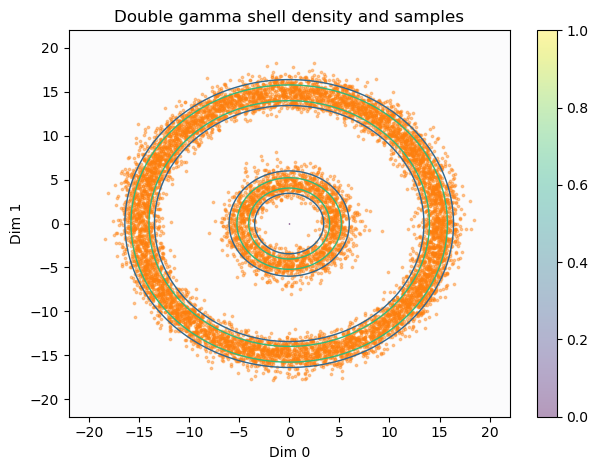

In [8]:
resolution = 1500

u_helper = DoubleGammaShell()
x = u_helper.sample((10000,))

xs = torch.linspace(-22, 22, resolution)
ys = torch.linspace(-22, 22, resolution)
xx, yy = torch.meshgrid(xs, ys, indexing="xy")
xx_flat, yy_flat = xx.ravel(), yy.ravel()
zz_flat = -u_helper(torch.concat([xx_flat[:, None], yy_flat[:, None]], dim=1))
zz_flat = zz_flat.exp()
zz = zz_flat.view_as(xx)

min_level = zz.min()
max_level = zz.max()
n_levels = 4

plt.figure()
plt.contourf(
    xx.numpy(),
    yy.numpy(),
    zz.numpy(),
    levels=np.linspace(min_level, max_level, n_levels),
    alpha=0.02
)

plt.contour(
    xx.numpy(),
    yy.numpy(),
    zz.numpy(),
    levels=np.linspace(min_level, max_level, n_levels),
    linewidths=1
)
plt.scatter(x[:, 0], x[:, 1], s=3, alpha=0.4, c='tab:orange')
plt.title("Double gamma shell density and samples")
plt.xlabel("Dim 0")
plt.ylabel("Dim 1")
plt.tight_layout()
plt.colorbar()
plt.show()